### Data Description
This dataset is part of the Give Me Some Credit Kaggle competition. The data contains loan applicant information collected by a US credit bureau. Each row represents a single loan application and the information gathered on the applicant at the time of the application.

### Data processing and exploration

In [1]:
# Clone data
!wget https://raw.githubusercontent.com/gnvml/Data-Ingestion-System-in-AWS/master/data/sample_data.csv

--2022-08-19 04:35:03--  https://raw.githubusercontent.com/gnvml/Data-Ingestion-System-in-AWS/master/data/sample_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7564965 (7.2M) [text/plain]
Saving to: ‘sample_data.csv.2’

sample_data.csv.2   100%[===================>]   7.21M  --.-KB/s    in 0.07s   

2022-08-19 04:35:03 (107 MB/s) - ‘sample_data.csv.2’ saved [7564965/7564965]



In [2]:
# Import library
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
df = pd.read_csv('sample_data.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Get info of dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### Handling with missing dataset

In [6]:
# Drop nan columns
df = df.dropna()
df
# How about filling missing data ? We will try later

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Visualize the distribution of each feature in dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ddf638c10>,
      dtype=object)

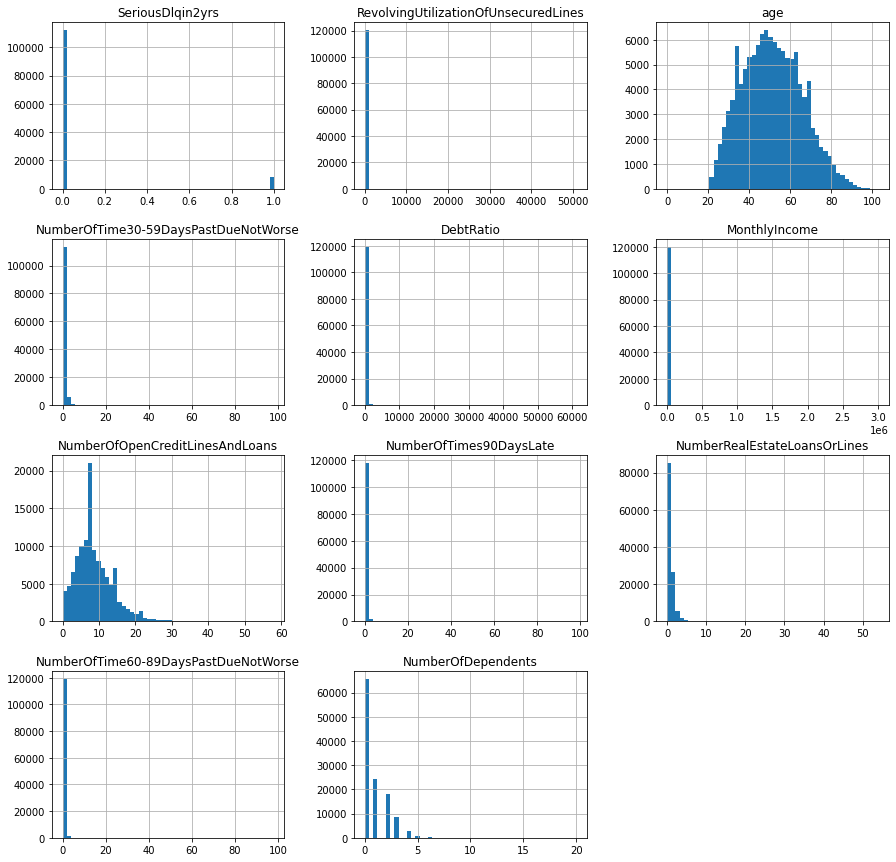

In [7]:
df.hist(bins=50, figsize=(15, 15))

### Visualize the correlation between all features

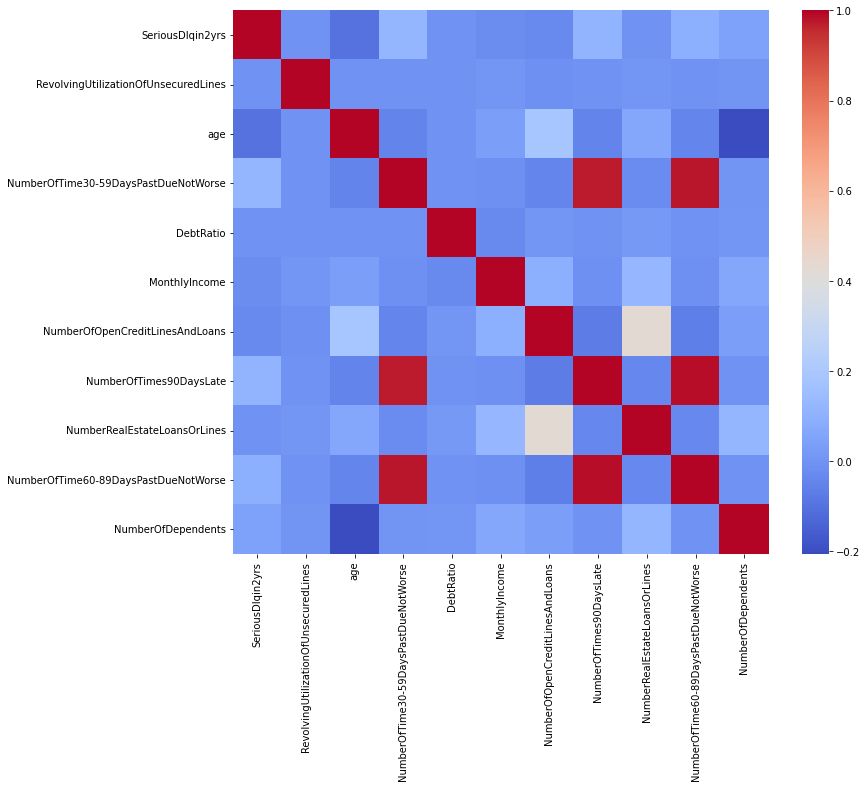

In [8]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We find that there are some pairs of feature with high correlation:
1. NumberOfTimes90DaysLate vs NumberOfTime30-59DaysPastDueNotWorse
2. NumberOfTime60-89DaysPastDueNotWorse vs NumberOfTime30-59DaysPastDueNotWorse
3. NumberOfTime60-89DaysPastDueNotWorse vs NumberOfTimes90DaysLate
4. NumberOfOpenCreditLinesAndLoans vs NumberRealEstateLoansOrLines


### Let's plot the correlation

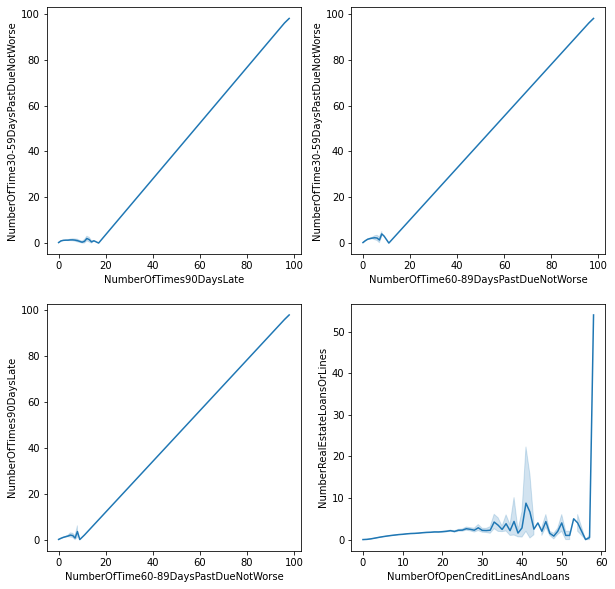

In [9]:
fig, axes = plt.subplots(4//2, 2, figsize=(10, 10))
corr_col = [['NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse'],\
            ['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse'],\
            ['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],\
            ['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']]
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.lineplot(x = corr_col[i][0], y = corr_col[i][1], data=df, ax=axis)
        i+=1



### Detect and exclude outliers

In [10]:
from scipy import stats
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [11]:
df_clean

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Visualize the distribution of each feature in clean dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ddebb7850>,
      dtype=object)

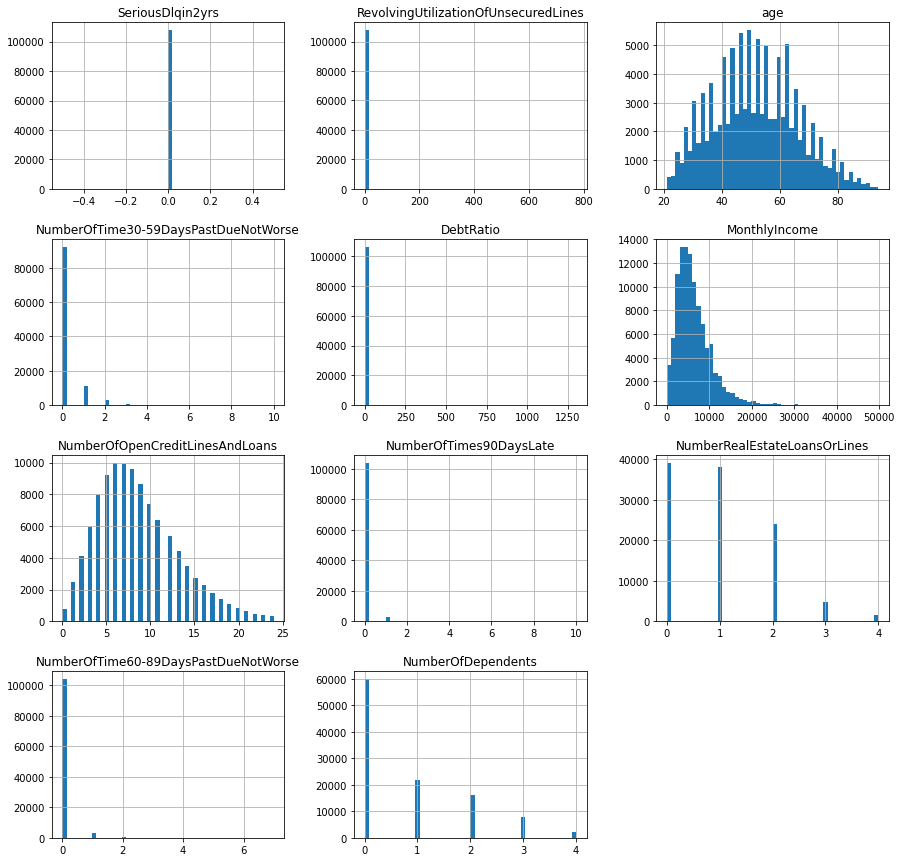

In [12]:
df_clean.hist(bins=50, figsize=(15, 15))

### Let's plot the correlation of clean dataframe

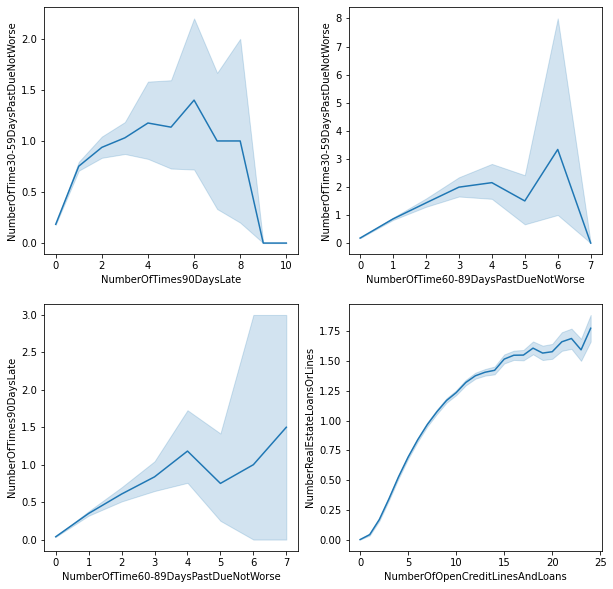

In [13]:
fig, axes = plt.subplots(4//2, 2, figsize=(10, 10))
corr_col = [['NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse'],\
            ['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse'],\
            ['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],\
            ['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']]
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.lineplot(x = corr_col[i][0], y = corr_col[i][1], data=df_clean, ax=axis)
        i+=1

